In [ ]:
pip install pandas scikit-learn seaborn

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score,confusion_matrix
import pandas as pd
import seaborn as sns
import numpy as np


In [ ]:
data=pd.read_csv("ecommerce.csv")

In [ ]:
data.head()

,Customer ID,Age,Gender,Income,Location,Device Used,Product Categories Purchased,Total Orders,Average Order Value,Days Since Last Purchase,Customer Lifetime Value,Customer Type,Engagement Level,Cart Abandonment Rate,Churn Risk
0,CUST0001,56,Other,94288,Dallas,Desktop,"Clothing, Electronics",98,419,55,41062,Returning,Low,0.226802,Low
1,CUST0002,69,Other,81195,Dallas,Tablet,"Beauty, Home & Kitchen, Electronics",23,186,252,4278,Returning,High,0.519913,High
2,CUST0003,46,Female,50581,Dallas,Desktop,"Sports, Clothing, Beauty",190,364,121,69160,VIP,Low,0.184028,Medium
3,CUST0004,32,Female,82648,San Jose,Desktop,Electronics,27,289,105,7803,Returning,Medium,0.212405,Medium
4,CUST0005,60,Female,60087,San Antonio,Tablet,"Electronics, Clothing, Home & Kitchen",58,111,129,6438,Returning,Low,0.268700,Medium


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   1000 non-null   object 
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Income                        1000 non-null   int64  
 4   Location                      1000 non-null   object 
 5   Device Used                   1000 non-null   object 
 6   Product Categories Purchased  1000 non-null   object 
 7   Total Orders                  1000 non-null   int64  
 8   Average Order Value           1000 non-null   int64  
 9   Days Since Last Purchase      1000 non-null   int64  
 10  Customer Lifetime Value       1000 non-null   int64  
 11  Customer Type                 1000 non-null   object 
 12  Engagement Level              1000 non-null   object 
 13  Cart

In [ ]:
data.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Income,0
Location,0
Device Used,0
Product Categories Purchased,0
Total Orders,0
Average Order Value,0
Days Since Last Purchase,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe()

,Age,Income,Total Orders,Average Order Value,Days Since Last Purchase,Customer Lifetime Value,Cart Abandonment Rate
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000
mean,44.385000,91431.922000,102.125000,314.37400,182.130000,32196.60500,0.374356
std,15.321669,34579.594736,56.446325,160.40163,106.209668,25928.64226,0.190120
min,18.000000,30163.000000,5.000000,31.00000,0.000000,486.00000,0.050881
25%,31.750000,61144.250000,55.750000,175.75000,87.750000,11034.50000,0.209831
50%,45.000000,91805.000000,101.000000,315.50000,185.000000,24968.50000,0.374102
75%,57.000000,122451.250000,152.000000,445.00000,276.250000,47265.00000,0.543676
max,70.000000,149979.000000,200.000000,599.00000,365.000000,115639.00000,0.699810


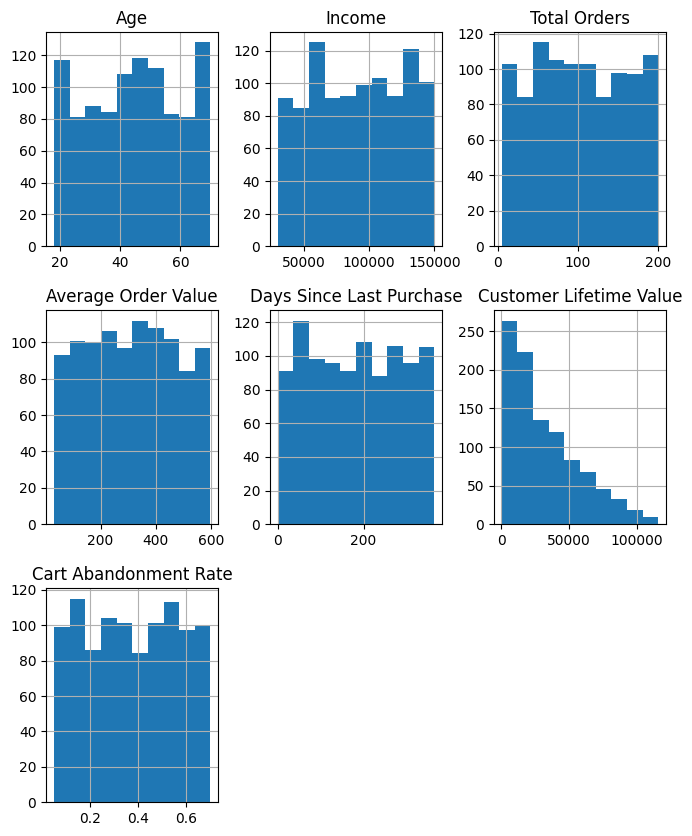

In [ ]:
data.hist(figsize=(8,10))
plt.show()


find categorical values

In [ ]:
categorical=data.select_dtypes(include=["object","category"]).columns

In [ ]:
categorical

Index(['Customer ID', 'Gender', 'Location', 'Device Used',
       'Product Categories Purchased', 'Customer Type', 'Engagement Level',
       'Churn Risk'],
      dtype='object')

In [ ]:
data.dropna(inplace=True)

In [ ]:
X=data.select_dtypes(include=["number"])

In [ ]:
X

,Age,Income,Total Orders,Average Order Value,Days Since Last Purchase,Customer Lifetime Value,Cart Abandonment Rate
0,56,94288,98,419,55,41062,0.226802
1,69,81195,23,186,252,4278,0.519913
2,46,50581,190,364,121,69160,0.184028
3,32,82648,27,289,105,7803,0.212405
4,60,60087,58,111,129,6438,0.268700
...,...,...,...,...,...,...,...
995,25,121074,33,455,153,15015,0.478640
996,66,107360,129,445,149,57405,0.644397
997,52,80979,118,55,57,6490,0.108574
998,69,127661,157,400,62,62800,0.550813


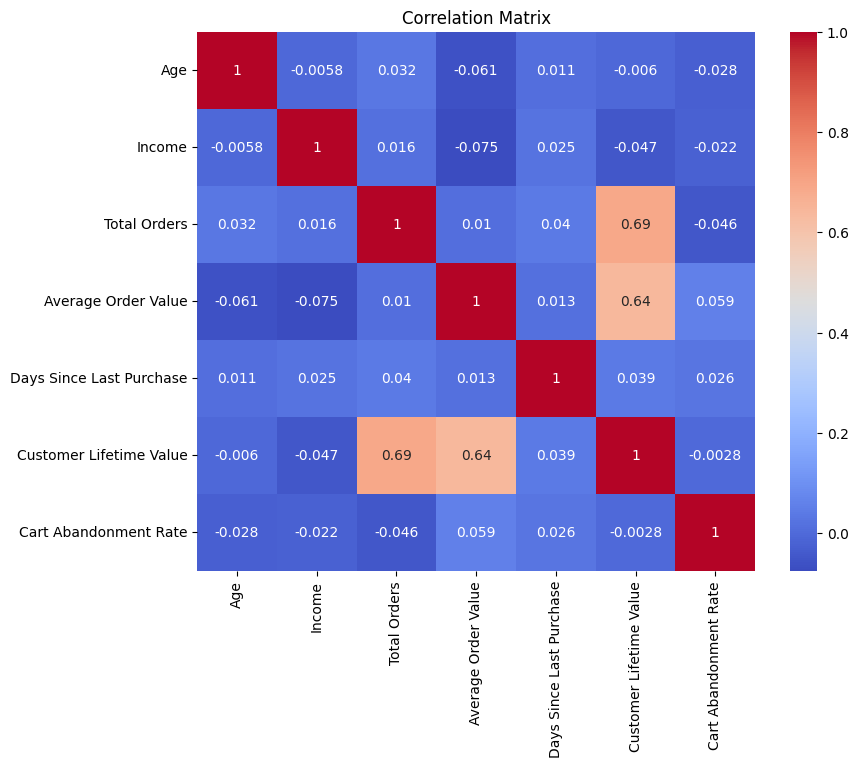

In [ ]:
#correlation matrix
plt.figure(figsize=(9,7))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

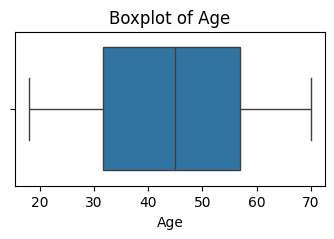

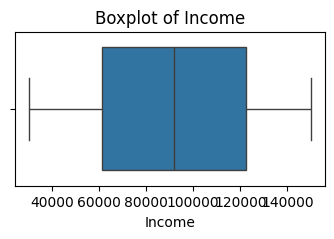

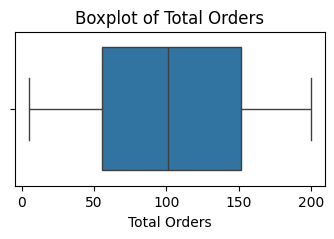

In [ ]:
for column in ['Age', 'Income', 'Total Orders']:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


In [ ]:
scaler=StandardScaler()
scaled=scaler.fit_transform(X)

In [ ]:
scaled

array([[ 0.75845603,  0.08263564, -0.07311484, ..., -1.19757095,
         0.34208621, -0.77649761],
       [ 1.60735214, -0.29618752, -1.40247559, ...,  0.65817889,
        -1.07728644,  0.76598895],
       [ 0.10545902, -1.18195031,  1.55756767, ..., -0.57584765,
         1.42629491, -1.00159163],
       ...,
       [ 0.49725722, -0.3024371 ,  0.28138136, ..., -1.17873085,
        -0.99193269, -1.39866623],
       [ 1.60735214,  1.0482253 ,  0.97264895, ..., -1.1316306 ,
         1.18088359,  0.92859735],
       [-0.80873679, -1.5755005 ,  0.79540085, ..., -0.25556595,
         1.10594825,  0.40297291]])

In [ ]:
Kmeans=KMeans(n_clusters=3,random_state=23)
Kmeans.fit(scaled)


KMeans(n_clusters=3, random_state=23)

In [ ]:
data["cluster"]=Kmeans.labels_

In [ ]:
cluster_center=Kmeans.cluster_centers_
print(cluster_center)

[[-0.06039805 -0.05308316  0.79970463  0.81621059  0.00762362  1.2428866
  -0.03195232]
 [-0.18197456 -0.17536206 -0.96392948  0.23207534 -0.12327088 -0.60288
   0.39495671]
 [ 0.23398242  0.22084823  0.22656764 -0.96708557  0.114593   -0.53017753
  -0.3603444 ]]


In [ ]:
data

,Customer ID,Age,Gender,Income,Location,Device Used,Product Categories Purchased,Total Orders,Average Order Value,Days Since Last Purchase,Customer Lifetime Value,Customer Type,Engagement Level,Cart Abandonment Rate,Churn Risk,cluster
0,CUST0001,56,Other,94288,Dallas,Desktop,"Clothing, Electronics",98,419,55,41062,Returning,Low,0.226802,Low,0
1,CUST0002,69,Other,81195,Dallas,Tablet,"Beauty, Home & Kitchen, Electronics",23,186,252,4278,Returning,High,0.519913,High,1
2,CUST0003,46,Female,50581,Dallas,Desktop,"Sports, Clothing, Beauty",190,364,121,69160,VIP,Low,0.184028,Medium,0
3,CUST0004,32,Female,82648,San Jose,Desktop,Electronics,27,289,105,7803,Returning,Medium,0.212405,Medium,1
4,CUST0005,60,Female,60087,San Antonio,Tablet,"Electronics, Clothing, Home & Kitchen",58,111,129,6438,Returning,Low,0.268700,Medium,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CUST0996,25,Other,121074,Dallas,Mobile,"Home & Kitchen, Beauty",33,455,153,15015,Returning,Medium,0.478640,Medium,1
996,CUST0997,66,Female,107360,Dallas,Desktop,"Beauty, Electronics, Home & Kitchen",129,445,149,57405,VIP,High,0.644397,Medium,0
997,CUST0998,52,Other,80979,New York,Tablet,"Clothing, Sports",118,55,57,6490,VIP,Medium,0.108574,Low,2
998,CUST0999,69,Male,127661,Chicago,Desktop,Sports,157,400,62,62800,VIP,Medium,0.550813,Medium,0


<Axes: xlabel='Income', ylabel='Average Order Value'>

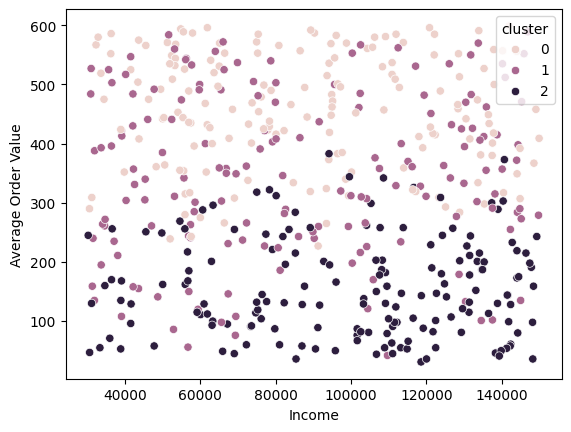

In [ ]:
sns.scatterplot(data=data,x=X.iloc[:500, 1], y=X.iloc[:500,3],hue=data["cluster"])


Visualize cluster using PCA

In [ ]:
pca=PCA(n_components=2)
X_d=pca.fit_transform(scaled)

In [ ]:
df=pd.DataFrame(X_d,columns=["PC1","PC2"])

In [ ]:
df

,PC1,PC2
0,0.428709,-0.277258
1,-1.834537,0.052504
2,1.988757,-0.613827
3,-1.440006,0.644399
4,-1.705999,-0.493947
...,...,...
995,-0.717641,1.465581
996,1.261234,0.107098
997,-1.396571,-1.501525
998,1.439447,-0.719717


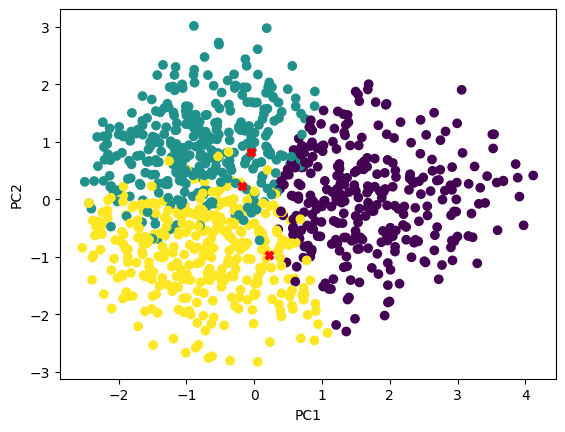

In [ ]:
sns.scatterplot()
plt.scatter(X_d[:,0],X_d[:,1],c=data["cluster"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(cluster_center[:,1],cluster_center[:,3],marker='X',color='red')

choosing no. of clusters

In [ ]:
range_cluster=list(range(2,8))

In [ ]:
sil_score=[]

In [ ]:
for n_clusters in range_cluster:
  kmeans=KMeans(n_clusters=n_clusters,random_state=23)
  Kmeans.fit(scaled)
  labels=Kmeans.labels_
  sil_score.append(silhouette_score(scaled,labels))


In [ ]:
no_cluster = range_cluster[sil_score.index(max(sil_score))]
print("number of clusters:",no_cluster)


number of clusters: 2


In [ ]:
score=silhouette_score(scaled,labels)
print("silhoutte score:",score)

silhoutte score: 0.14830036790937193


elbow method

In [ ]:
wcss=[]

In [ ]:
for k in range(2,10):
  Kmeans=KMeans(n_clusters=k,random_state=23)
  Kmeans.fit(scaled)
  wcss.append(Kmeans.inertia_)

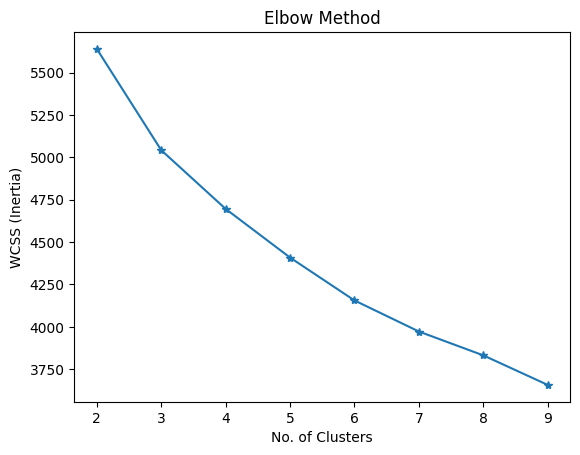

In [ ]:
plt.plot(range(2, 10), wcss, marker='*')
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()